# Import Library

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math 

In [2]:
data_train = pd.read_csv('D:\PutraInforMatika\SEMESTER 7\SKRIPSI\Program/data_train.csv')
data_uji = pd.read_csv('D:\PutraInforMatika\SEMESTER 7\SKRIPSI\Program/data_uji.csv')

data_train = data_train.drop('Unnamed: 0', axis=1)
data_uji = data_uji.drop('Unnamed: 0', axis=1)

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      427 non-null    float64
 1   Hemoglobin  427 non-null    float64
 2   MCH         427 non-null    float64
 3   MCHC        427 non-null    float64
 4   MCV         427 non-null    float64
 5   Result      427 non-null    float64
dtypes: float64(6)
memory usage: 20.1 KB


In [4]:
data_train.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,0.0,9.0,21.5,29.6,71.2,1.0
1,0.0,11.6,22.3,30.9,74.5,1.0
2,0.0,6.9,28.1,32.5,94.6,1.0
3,0.0,10.7,21.3,29.1,78.7,1.0
4,0.0,11.2,16.1,30.3,82.6,1.0


In [5]:
data_uji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      107 non-null    float64
 1   Hemoglobin  107 non-null    float64
 2   MCH         107 non-null    float64
 3   MCHC        107 non-null    float64
 4   MCV         107 non-null    float64
 5   Result      107 non-null    float64
dtypes: float64(6)
memory usage: 5.1 KB


In [6]:
data_uji.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,0.0,11.4,16.2,29.8,97.0,1.0
1,0.0,11.7,16.8,32.2,73.6,1.0
2,0.0,11.1,24.7,32.1,96.7,1.0
3,0.0,10.9,28.6,28.6,84.8,1.0
4,0.0,10.8,19.7,29.5,93.0,1.0


# Visualisasi Data

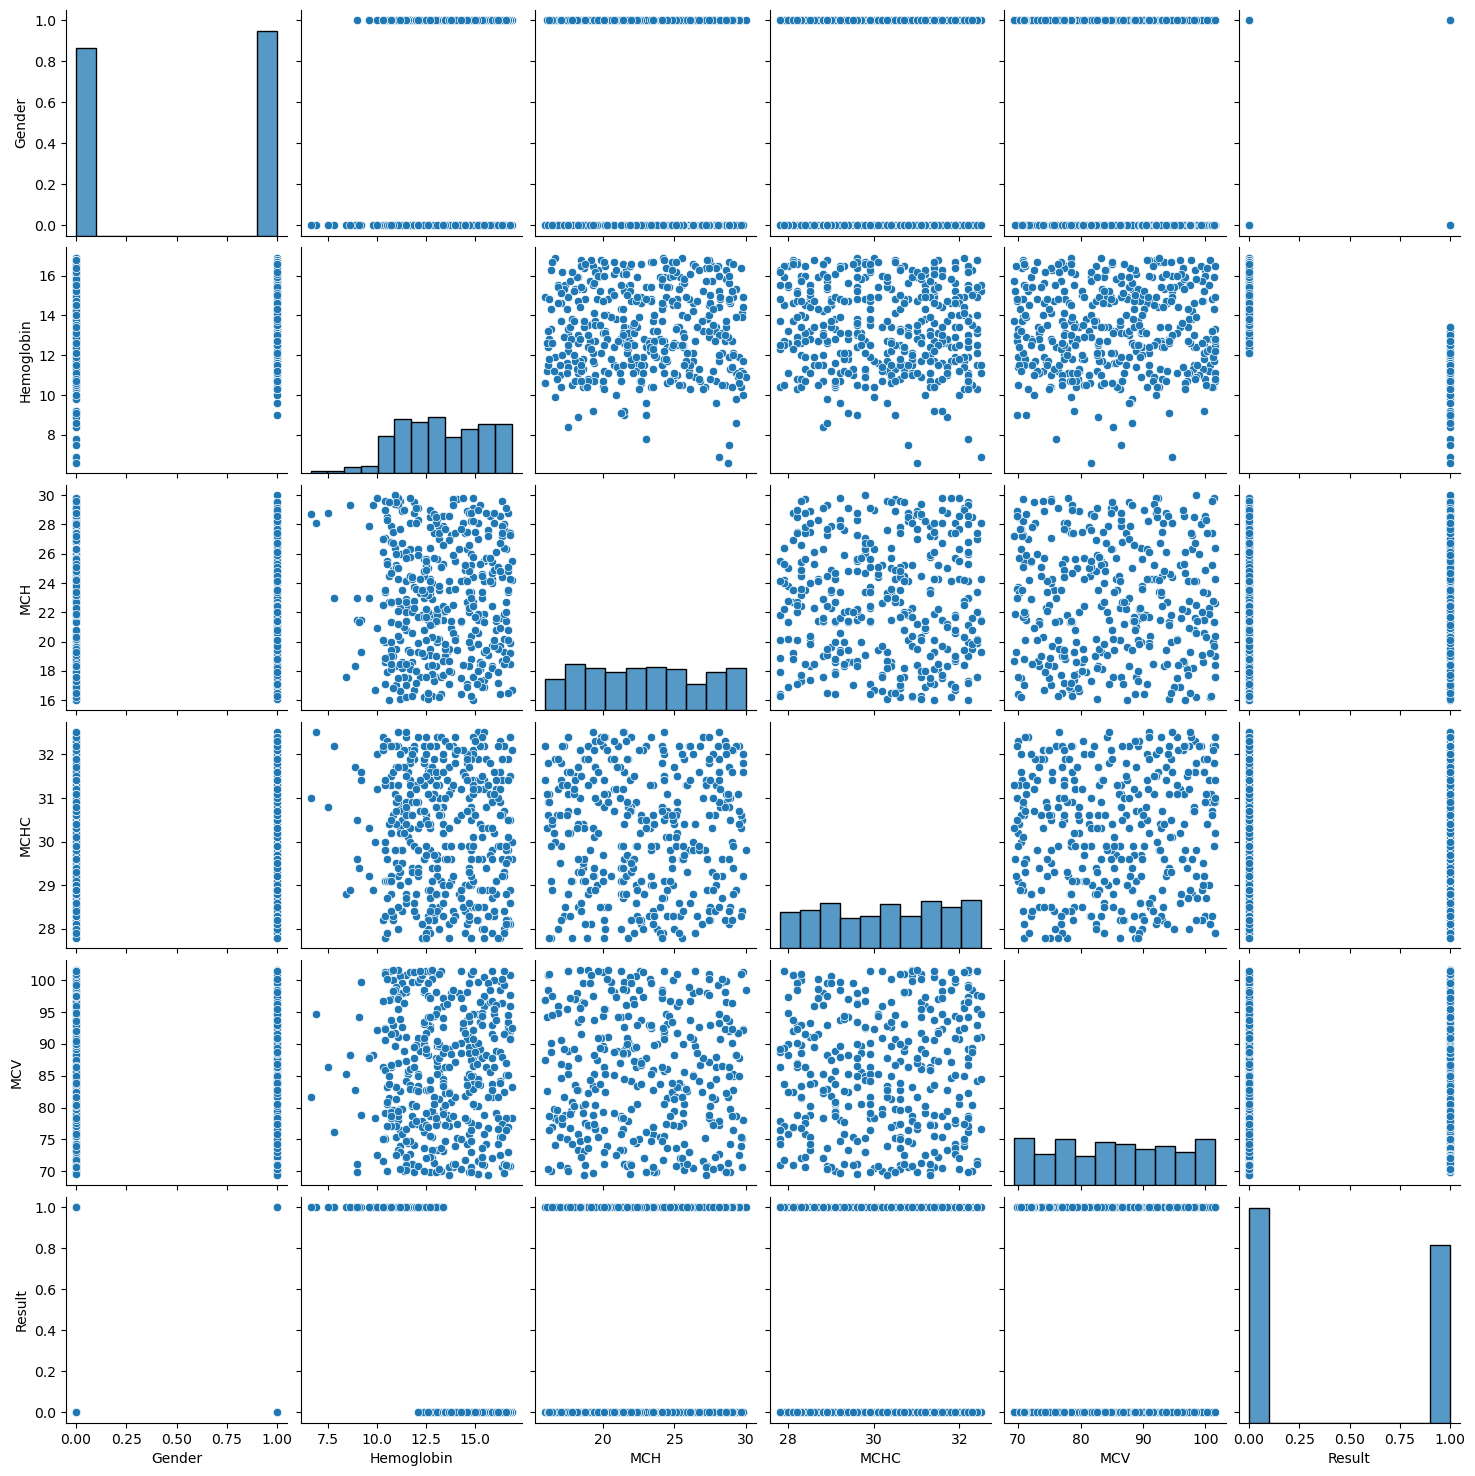

In [8]:
sns.pairplot(data_train)

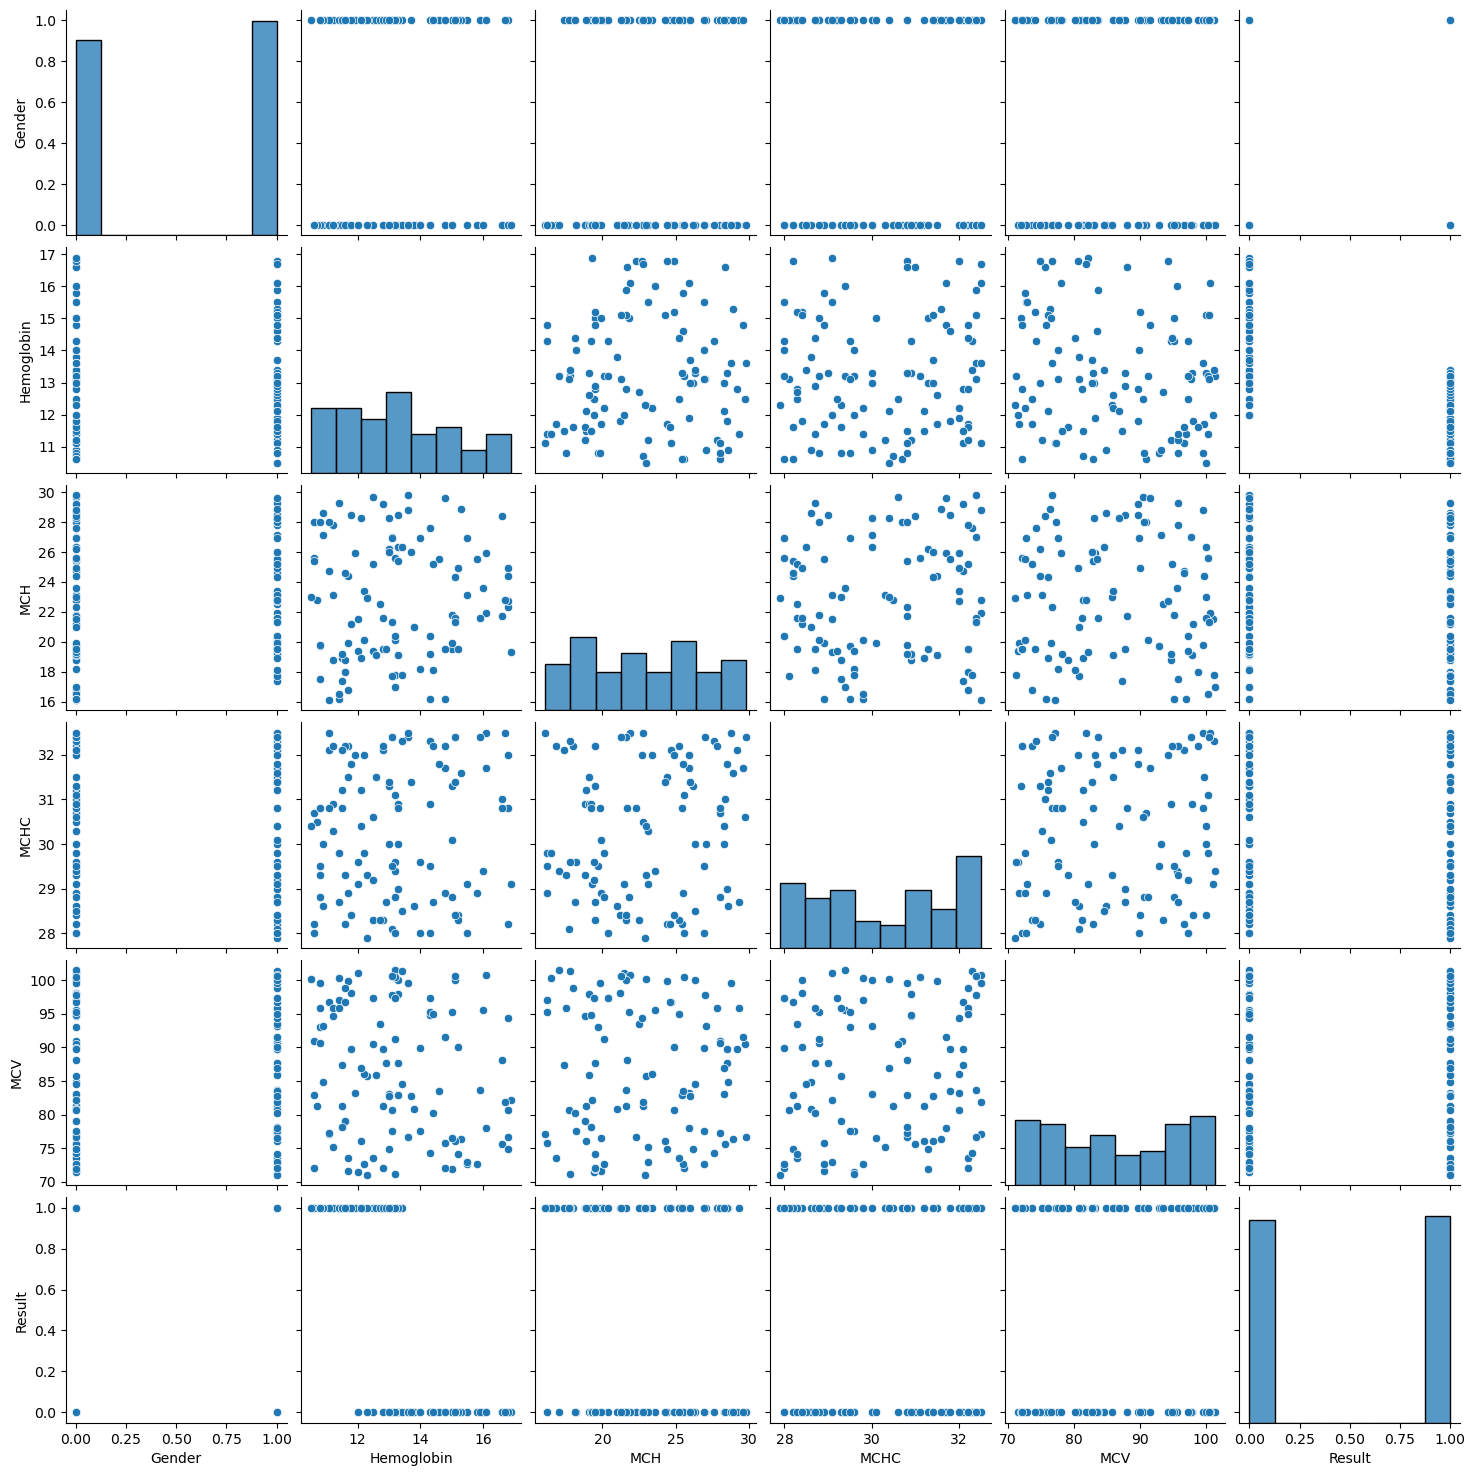

In [10]:
sns.pairplot(data_uji)

# Pembuatan Model

### Gaussian Naive Bayes 

In [18]:
# Peluang Anemia dan Tidak Anemia

def peluang(data, kelas):
    
    count = 0
    i = 0
    while i<len(data):
        if(data.iloc[i].Result == kelas):
            count += 1
        i += 1
    
    return count/len(data)


# Menghitung Peluang Pria dan Wanita dengan kelas Anemia atau Tidak Anemia

def hitungPrior(data, gender, kelas):
    
    count = 0
    i = 0
    while i<len(data):
        if(data.iloc[i].Gender == gender
           and data.iloc[i].Result == kelas):
            count += 1
        i += 1
    
    return count/len(data)

# Menghitung Mean dan Standard Deviasi Pada Data Kontinu Yaitu Hemoglobin, MCH, MCHC, MVC
def hitungMean(data, fitur, gender, kelas):
    
    mean = 0
    count = 0
    i = 0
    # Menghitung Mean
    while i < len(data):
        if(data.iloc[i].Gender == gender
           and data.iloc[i].Result == kelas):
            mean += data[fitur].iloc[i]
            count +=1
            
        i = i + 1
    
    return mean/count

def hitungSTD(data, fitur, gender, kelas):
    std = 0
    i = 0
    count = 0
    
    mean = hitungMean(data_train, fitur, gender, kelas)
    while i < len(data):
        if(data.iloc[i].Gender == gender
           and data.iloc[i].Result == kelas):
            hitung = pow(data[fitur].iloc[i] - mean, 2) 
            std += hitung
            hitung = 0
            count += 1
            
        i = i + 1
    
    hasil = {'mean': mean, 'std': math.sqrt(std / count)}
    return hasil

def hitungLikelihood(fitur, mean, std):
    hitung1 = 1/math.sqrt(2*3.14*pow(std, 2))
    hitung2 = pow((fitur - mean), 2)
    hitung3 = 2*pow(std, 2)
    hitung4 = -1*(hitung2 / hitung3)
    hitung5 = pow(2.7183, hitung4)
    final = hitung1 * hitung5 
    
    return round(final, 5)

In [19]:
# Model Gaussian Naive Bayes

def model(gender, hemoglobin, mch, mchc, mcv):
    
    # Hitung Hemoglobin 
    hitungHemoglobinA = hitungSTD(data_train, "Hemoglobin", gender, 1)
    hitungHemoglobinTA = hitungSTD(data_train, "Hemoglobin", gender, 0)
    
    # Hitung MCH 
    hitungMCHA = hitungSTD(data_train, "MCH", gender, 1)
    hitungMCHTA = hitungSTD(data_train, "MCH", gender, 0)
    
    # Hitung MCHC 
    hitungMCHCA = hitungSTD(data_train, "MCHC", gender, 1)
    hitungMCHCTA = hitungSTD(data_train, "MCHC", gender, 0)
    
    # Hitung MCV 
    hitungMCVA = hitungSTD(data_train, "MCV", gender, 1)
    hitungMCVTA = hitungSTD(data_train, "MCV", gender, 0)
    
    # Prior Gender Anemia dan Tidak Anemia
    priorGenderA = hitungPrior(data_train, gender, 1)
    priorGenderTA = hitungPrior(data_train, gender, 0)
    
    # Prior Anemia dan Tidak Anemia
    priorA = peluang(data_train, 1)
    priorTA = peluang(data_train, 0)
    
    # Menghitung Likelihood Anemia
    hemoglobinLikeA = hitungLikelihood(hemoglobin, hitungHemoglobinA['mean'], hitungHemoglobinA['std'])
    mchLikeA = hitungLikelihood(mch, hitungMCHA['mean'], hitungMCHA['std'])
    mchcLikeA = hitungLikelihood(mchc, hitungMCHCA['mean'], hitungMCHCA['std'])
    mcvLikeA = hitungLikelihood(mcv, hitungMCVA['mean'], hitungMCVA['std'])
    
    # Menghitung Likelihood Tidak Anemia
    hemoglobinLikeTA = hitungLikelihood(hemoglobin, hitungHemoglobinTA['mean'], hitungHemoglobinTA['std'])
    mchLikeTA = hitungLikelihood(mch, hitungMCHTA['mean'], hitungMCHTA['std'])
    mchcLikeTA = hitungLikelihood(mchc, hitungMCHCTA['mean'], hitungMCHCTA['std'])
    mcvLikeTA = hitungLikelihood(mcv, hitungMCVTA['mean'], hitungMCVTA['std'])
    
    # Prediksi
    predA = priorA * priorGenderA * hemoglobinLikeA * mchLikeA * mchcLikeA * mcvLikeA
    predTA = priorTA * priorGenderTA * hemoglobinLikeTA * mchLikeTA * mchcLikeTA * mcvLikeTA

    if(predA > predTA):
        hasil = 1
    else:
        hasil = 0
    
    return hasil


In [20]:
predict = model(0, 11.4, 16.2, 29.8, 97.0)
if predict == 1:
    print("Anemia")
else:
    print("Tidak Anemia")

Anemia


In [21]:
i = 0
tp = 0
tn = 0
fp = 0
fn = 0

while i<len(data_uji):
    pred = model(data_uji.iloc[i].Gender, 
          data_uji.iloc[i].Hemoglobin, 
          data_uji.iloc[i].MCH, 
          data_uji.iloc[i].MCHC, 
          data_uji.iloc[i].MCV)
    
    if(pred == data_uji.iloc[i].Result):
        if(pred == 1):
            tp += 1
        else:
            tn += 1
    else:
        if(pred == 1):
            fp += 1
        else:
            fn += 1
    
    i += 1
    print("Data Ke-", i, " = ", pred)


Data Ke- 1  =  1
Data Ke- 2  =  1
Data Ke- 3  =  1
Data Ke- 4  =  1
Data Ke- 5  =  1
Data Ke- 6  =  1
Data Ke- 7  =  1
Data Ke- 8  =  1
Data Ke- 9  =  1
Data Ke- 10  =  1
Data Ke- 11  =  1
Data Ke- 12  =  1
Data Ke- 13  =  1
Data Ke- 14  =  1
Data Ke- 15  =  1
Data Ke- 16  =  1
Data Ke- 17  =  1
Data Ke- 18  =  1
Data Ke- 19  =  0
Data Ke- 20  =  0
Data Ke- 21  =  0
Data Ke- 22  =  0
Data Ke- 23  =  0
Data Ke- 24  =  0
Data Ke- 25  =  0
Data Ke- 26  =  0
Data Ke- 27  =  0
Data Ke- 28  =  0
Data Ke- 29  =  0
Data Ke- 30  =  0
Data Ke- 31  =  0
Data Ke- 32  =  0
Data Ke- 33  =  0
Data Ke- 34  =  0
Data Ke- 35  =  0
Data Ke- 36  =  1
Data Ke- 37  =  0
Data Ke- 38  =  0
Data Ke- 39  =  0
Data Ke- 40  =  0
Data Ke- 41  =  0
Data Ke- 42  =  0
Data Ke- 43  =  0
Data Ke- 44  =  0
Data Ke- 45  =  0
Data Ke- 46  =  0
Data Ke- 47  =  0
Data Ke- 48  =  0
Data Ke- 49  =  0
Data Ke- 50  =  0
Data Ke- 51  =  0
Data Ke- 52  =  1
Data Ke- 53  =  1
Data Ke- 54  =  1
Data Ke- 55  =  1
Data Ke- 56  =  1
D

#### Hasil Confusion Matrix Algoritma Gaussian Naive Bayes 

In [22]:
def confusionMatrix(tp, tn, fp, fn):
    hasil = {
        'akurasi': (tp+tn) / (tp + tn + fp + fn),
        'presisi': tp / (tp + fp),
        'recal': tp / (tp + fn),
        'specificity': tn / (tn + fp),
        'f1-score': tp / (tp + 0.5 * (fp + fn))
    }
    
    return hasil

In [23]:
hasilGaussianNB = confusionMatrix(tp, tn, fp, fn)
print(hasilGaussianNB)

{'akurasi': 0.9906542056074766, 'presisi': 0.9818181818181818, 'recal': 1.0, 'specificity': 0.9811320754716981, 'f1-score': 0.9908256880733946}


### K-Nearest Neighbor 

<p>Pada algoritma K-Nearest Neighbor (KNN) terdapat beberapa perhitungan jarak dan pada klasifikasi penyakit anemia ini akan digunakanlah perhitungan jarak Euclidien</p>

#### Untuk Satu Variabel

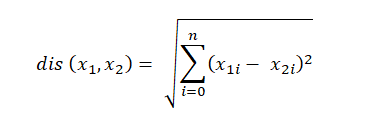

### Banyak Variable 

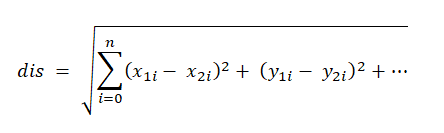

In [25]:
def modelKNN(gender, hemoglobin, mch, mchc, mcv, k):
    
    i = 0
    jarak = []
    while i < len(data_train):
        
        hitung = math.sqrt( pow((data_train.iloc[i].Hemoglobin - hemoglobin), 2) + 
                       pow((data_train.iloc[i].MCH - mch), 2) +
                       pow((data_train.iloc[i].MCHC - mchc), 2) +
                       pow((data_train.iloc[i].MCV - mcv), 2))
        jarak.append([i, hitung])
        hitung = 0
        
        i += 1
    
    selection_sort(jarak)
    
    i = 0
    anemia = 0
    not_anemia = 0
    while i < k:   
        if(data_train.iloc[jarak[i][0]].Result == 1):
            anemia += 1
        else:
            not_anemia += 1
            
        i += 1
    
    if(anemia > not_anemia):
        return 1
    else:
        return 0

def selection_sort(arr):
    n = len(arr)
    
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j][1] < arr[min_index][1]:
                min_index = j

        arr[i], arr[min_index] = arr[min_index], arr[i]

    return arr
    

In [27]:
# Deklarasi Nilai K
k = 5

# 1.0	13.7	26.0	31.4	82.8	0.0 
pred = modelKNN(1, 13.7, 26.0, 31.4, 82.8, k)
if pred == 1:
    print("Anemia")
else:
    print("Tidak Anemia")

Tidak Anemia


In [28]:
i = 0
tp = 0
tn = 0
fp = 0
fn = 0

while i<len(data_uji):
    pred = modelKNN(data_uji.iloc[i].Gender, 
          data_uji.iloc[i].Hemoglobin, 
          data_uji.iloc[i].MCH, 
          data_uji.iloc[i].MCHC, 
          data_uji.iloc[i].MCV,
          k)
    
    if(pred == data_uji.iloc[i].Result):
        if(pred == 1):
            tp += 1
        else:
            tn += 1
    else:
        if(pred == 1):
            fp += 1
        else:
            fn += 1
    
    i += 1
    print("Data Ke-", i, " = ", pred)


Data Ke- 1  =  1
Data Ke- 2  =  1
Data Ke- 3  =  1
Data Ke- 4  =  1
Data Ke- 5  =  1
Data Ke- 6  =  1
Data Ke- 7  =  1
Data Ke- 8  =  1
Data Ke- 9  =  1
Data Ke- 10  =  1
Data Ke- 11  =  1
Data Ke- 12  =  1
Data Ke- 13  =  1
Data Ke- 14  =  1
Data Ke- 15  =  1
Data Ke- 16  =  1
Data Ke- 17  =  1
Data Ke- 18  =  1
Data Ke- 19  =  0
Data Ke- 20  =  0
Data Ke- 21  =  1
Data Ke- 22  =  0
Data Ke- 23  =  0
Data Ke- 24  =  0
Data Ke- 25  =  1
Data Ke- 26  =  0
Data Ke- 27  =  0
Data Ke- 28  =  0
Data Ke- 29  =  0
Data Ke- 30  =  0
Data Ke- 31  =  0
Data Ke- 32  =  0
Data Ke- 33  =  1
Data Ke- 34  =  0
Data Ke- 35  =  0
Data Ke- 36  =  1
Data Ke- 37  =  1
Data Ke- 38  =  0
Data Ke- 39  =  1
Data Ke- 40  =  0
Data Ke- 41  =  0
Data Ke- 42  =  0
Data Ke- 43  =  1
Data Ke- 44  =  0
Data Ke- 45  =  0
Data Ke- 46  =  0
Data Ke- 47  =  1
Data Ke- 48  =  0
Data Ke- 49  =  1
Data Ke- 50  =  1
Data Ke- 51  =  0
Data Ke- 52  =  1
Data Ke- 53  =  1
Data Ke- 54  =  1
Data Ke- 55  =  1
Data Ke- 56  =  1
D

In [29]:
hasilKNN = confusionMatrix(tp, tn, fp, fn)
print(hasilKNN)

{'akurasi': 0.8504672897196262, 'presisi': 0.8275862068965517, 'recal': 0.8888888888888888, 'specificity': 0.8113207547169812, 'f1-score': 0.8571428571428571}
